## Test Notebook for time domain feature extraction

Version: 0.6   
Date: 08/04/2022

In [ ]:
# optional install of the pyspch package
#!pip install git+https://github.com/compi1234/pyspch.git

In [1]:
%matplotlib inline
import os,sys, math
import numpy as np
import librosa

import pyspch.sp as Sps
import pyspch.core as Spch
import pyspch.display as Spd

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'

### Load a Data File and segmentation if available

In [8]:
src = 'https://homes.esat.kuleuven.be/~spchlab/data/'
#name = 'misc/bad_bead_booed'
name ='misc/b_8k'
name = 'misc/friendly'
#name = 'timit/si1027'

wavdata, sr = Spch.load_data(name+".wav",src=src)
seg = Spch.load_data(name+".phn",src=src)
# for timit files use these parameters
# seg = Spch.load_data(name+".phn",dt=.1/sr,src=src,xlat='timit61_41')

# Frame parameters and Spectral Processing
shift=0.01
length=0.030

spg = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift,n_mels=None,mode='dB')

In [3]:
rms,pitch,zcr = Sps.time_dom3(y=wavdata,sr=sr)

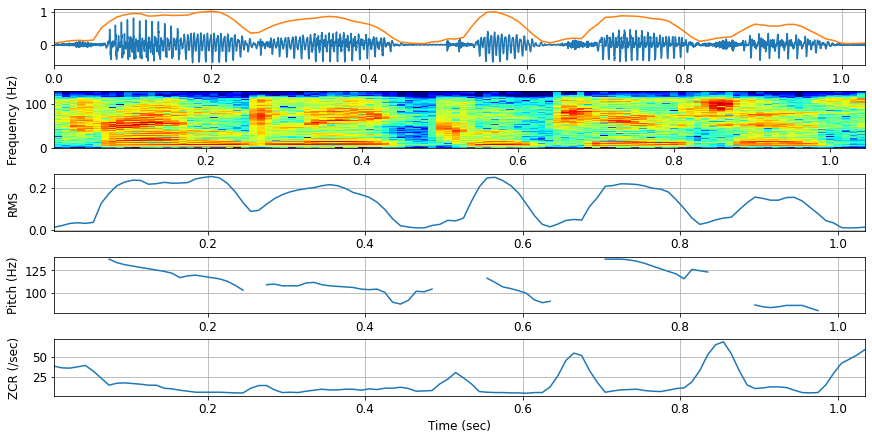

In [21]:
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,line_ftrs=[rms,pitch,zcr],dy=1,sample_rate=sr,
                     row_heights=[1,1,1,1,1])
fig.axes[2].set_ylabel("RMS")
fig.axes[3].set_ylabel("Pitch (Hz)")
fig.axes[4].set_ylabel("ZCR (/sec)")
fig.add_line_plot(4*rms,dx=0.01,iax=0)
display(fig)

In [28]:
rms10,_,_ = Sps.time_dom3(y=wavdata,sr=sr,length=0.01)
rms100,_,_ = Sps.time_dom3(y=wavdata,sr=sr,length=0.1)

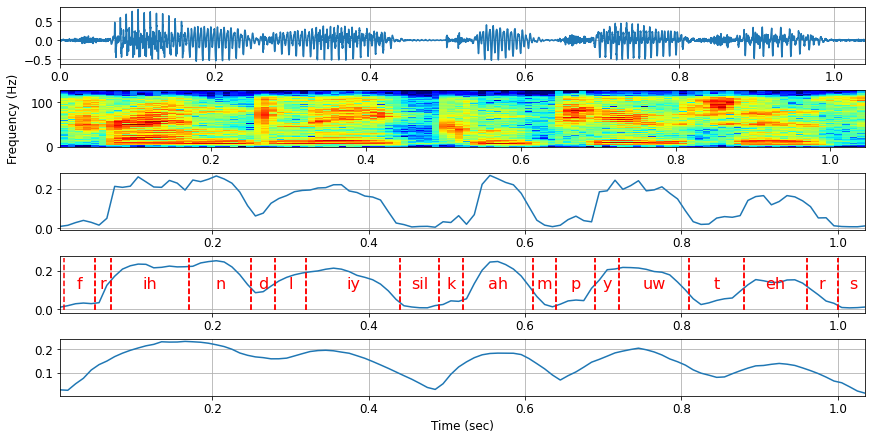

In [30]:
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,  line_ftrs=[rms10,rms,rms100],dy=1,sample_rate=sr,
                     row_heights=[1,1,1,1,1])
fig.add_seg_plot(seg,iax=3)
fig

### Time Domain Features with a short frame shift (5msec) and frame lengths in range of 5-100 msec

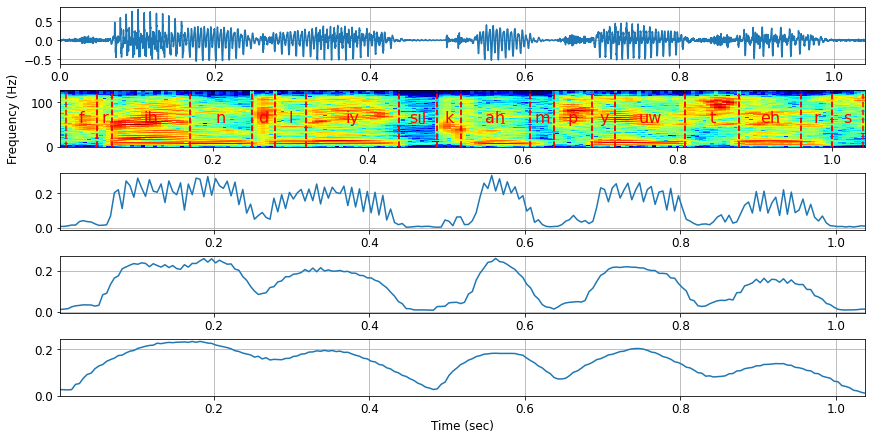

In [34]:
shift = 0.005
length = 0.03
spg = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift,n_mels=None,mode='dB')
rms,_,_ = Sps.time_dom3(y=wavdata,sr=sr,shift=shift,length=0.03)
rms1,_,_ = Sps.time_dom3(y=wavdata,sr=sr,shift=shift,length=0.005)
rms2,_,_ = Sps.time_dom3(y=wavdata,sr=sr,shift=shift,length=0.1)
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,  line_ftrs=[rms1,rms,rms2],shift=shift,dy=1,sample_rate=sr,
                     row_heights=[1,1,1,1,1])
fig.add_seg_plot(seg,iax=1)
fig